# 多項式回帰
単回帰と多項式回帰の精度の違いを検証

1. データ作成
2. 単回帰
3. 多項式回帰

In [2]:
import numpy as np
import matplotlib.pyplot as plt

## 1. データ作成

In [3]:
train_x=np.array([235,216,148,35,85,204,49,25,173,191,134,99,117,112,162,272,159,159,59,198])
train_y=np.array([591,539,413,310,308,519,325,332,498,498,392,334,385,387,425,659,400,427,319,522])

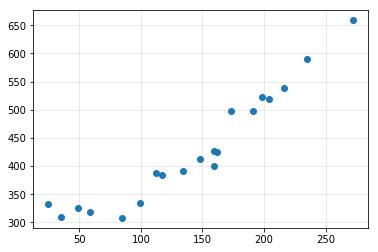

In [4]:
plt.plot(train_x,train_y,'o')
plt.grid(color='gray', alpha=0.2)
plt.show()

### 標準化

In [5]:
def standardize(x):
    return (x-x.mean())/x.std()

In [6]:
train_x=standardize(train_x)

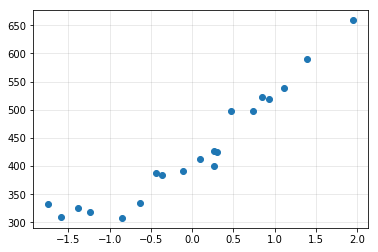

In [7]:
plt.plot(train_x,train_y,'o')
plt.grid(color='gray', alpha=0.2)
plt.show()

## 2. 単回帰
単項式での回帰

In [8]:
# 仮説関数（予測関数）
def f(x):
    return theta0+theta1*x

In [9]:
# 総データ数
m = len(train_x)

In [10]:
# 目的関数（コスト関数）：平均2乗誤差
def mse(x,y):
    return np.sum((y-f(x))**2)/m

In [11]:
# パラメーター初期値
np.random.seed(0)
theta0= np.random.randn()
theta1= np.random.randn()
print("theta0：",theta0)
print("theta1：",theta1)

theta0： 1.764052345967664
theta1： 0.4001572083672233


In [12]:
# 現在の誤差
loss=mse(train_x,train_y)
print("loss：",loss)

loss： 192276.72347230147


In [13]:
# 学習率
alpha=0.001
# 反復回数
iteration=500

In [14]:
# パラメーター初期値
np.random.seed(0)
theta0= np.random.randn()
theta1= np.random.randn()
loss_list=[]

for i in range(iteration):
    theta0=theta0-alpha*np.sum(f(train_x)-train_y)
    theta1=theta1-alpha*np.sum((f(train_x)-train_y)*train_x)
    loss=mse(train_x,train_y)
    loss_list.append(loss)
    
    #log="{}回目 ： theta0={:.3f}, theta1={:.3f}, loss={:.3f}"
    #print(log.format(i+1,theta0,theta1,loss))

### loss曲線

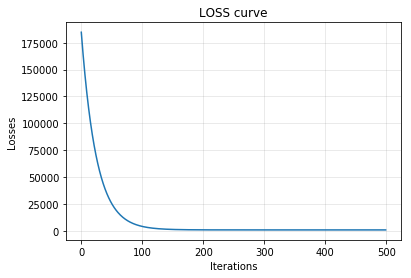

In [15]:
iter=np.arange(len(loss_list))
plt.plot(iter, loss_list)
plt.title("LOSS curve")
plt.xlabel("Iterations")
plt.ylabel("Losses")
plt.grid(color='gray', alpha=0.2)
plt.show()

In [16]:
# 最終反復回数のlossを出力
loss_list[-1]

954.3477700842707

### 単項式を描画

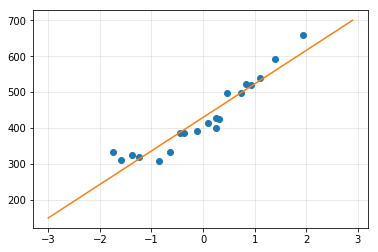

In [17]:
x=np.arange(-3,3,0.1)
plt.plot(train_x,train_y,'o')
plt.plot(x,f(x))
plt.grid(color='gray', alpha=0.2)
plt.show()

未学習がみられる。

## 3. 多項式回帰
2次多項式での回帰

In [18]:
# パラメーター初期化
np.random.seed(0)
theta=np.random.randn(3)
print("theta：",theta)

theta： [1.76405235 0.40015721 0.97873798]


In [19]:
# 学習データの行列
def to_matrix(x):
    return np.vstack((np.ones(len(x)), x, x**2)).T

In [20]:
X=to_matrix(train_x)
X

array([[ 1.        ,  1.39433428,  1.94416809],
       [ 1.        ,  1.11069026,  1.23363286],
       [ 1.        ,  0.09554325,  0.00912851],
       [ 1.        , -1.59139223,  2.53252924],
       [ 1.        , -0.8449606 ,  0.71395842],
       [ 1.        ,  0.93154667,  0.8677792 ],
       [ 1.        , -1.38239138,  1.91100592],
       [ 1.        , -1.74067856,  3.02996185],
       [ 1.        ,  0.46875906,  0.21973506],
       [ 1.        ,  0.73747445,  0.54386856],
       [ 1.        , -0.11345761,  0.01287263],
       [ 1.        , -0.63595975,  0.4044448 ],
       [ 1.        , -0.36724436,  0.13486842],
       [ 1.        , -0.44188752,  0.19526458],
       [ 1.        ,  0.3045441 ,  0.09274711],
       [ 1.        ,  1.94669369,  3.78961632],
       [ 1.        ,  0.25975821,  0.06747433],
       [ 1.        ,  0.25975821,  0.06747433],
       [ 1.        , -1.23310505,  1.52054807],
       [ 1.        ,  0.84197488,  0.70892169]])

In [21]:
# 仮説関数（予測関数）
def f(x):
    return np.dot(x, theta)

In [22]:
f(X)

array([4.22483642, 3.4159064 , 1.81121909, 3.60592784, 2.1247135 ,
       2.98614593, 3.08125255, 4.03304602, 2.16669271, 2.59146288,
       1.7312504 , 1.90541396, 1.74909771, 1.77834073, 1.97669299,
       6.25207729, 1.93403615, 1.93403615, 2.75883462, 2.79482325])

In [23]:
# 目的関数（コスト関数）：平均2乗誤差
def mse(x,y):
    return np.sum((y-f(x))**2)/m

In [24]:
# 学習率
alpha=0.01
# 反復回数
iteration=500

In [25]:
# パラメーター初期化
np.random.seed(0)
theta=np.random.randn(3)

loss_list=[]

for i in range(iteration):
    theta=theta-alpha*np.dot(f(X)-train_y,X)
    loss=mse(X,train_y)
    loss_list.append(mse(X,train_y))
    
    #log="{}回目 ： theta={}, loss={:.3f}"
    #print(log.format(i+1,theta,loss))


### loss曲線

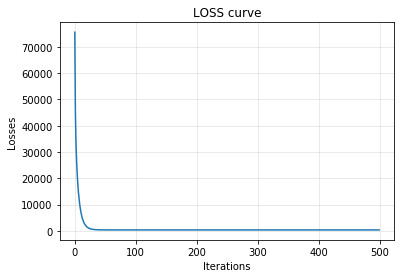

In [26]:
iter=np.arange(len(loss_list))
plt.plot(iter, loss_list)
plt.title("LOSS curve")
plt.xlabel("Iterations")
plt.ylabel("Losses")
plt.grid(color='gray', alpha=0.2)
plt.show()

In [27]:
# 最終反復回数のlossを出力
loss_list[-1]

327.786229643572

単回帰と比べ、lossが小さくなった。

### 多項式を描画

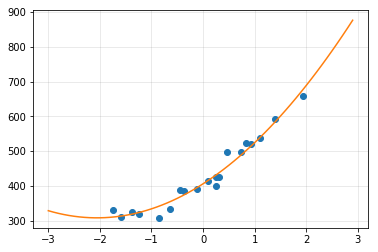

In [28]:
x=np.arange(-3,3,0.1)
plt.plot(train_x,train_y,'o')
plt.plot(x,f(to_matrix(x)))
plt.grid(color='gray', alpha=0.2)
plt.show()

単項式と比べ、学習されている。